In [ ]:
# default_exp api

In [ ]:
#hide_input
import pivotpy as pp 
pp.nav_links(7)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
> [&nbsp;`▶` MainAPI●&nbsp;](https://massgh.github.io/pivotpy/MainAPI)  


In [ ]:
#export
try:
    from pivotpy import vr_parser as vp
    from pivotpy import s_plots as sp
    from pivotpy import i_plots as ip
    from pivotpy import sio as sio
except:
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    import pivotpy.i_plots as ip
    import pivotpy.sio as sio
    
def _sub_doc(from_func,skip_param=None,replace={}):
    """Assing __doc__ from other function. Replace words in docs where need."""
    def wrapper(func):
        docs = '\n'.join(line for line in from_func.__doc__.splitlines() if skip_param not in line)
        for k,v in replace.items():
            docs = docs.replace(k,v)
        func.__doc__ = docs
        return func
    return wrapper

In [ ]:
#export 
# Direct function exports from modules 
fancy_quiver3d = sio.fancy_quiver3d
InvokeMaterialsProject = sio.InvokeMaterialsProject

In [ ]:
#export
class POSCAR:
    "POSACR class to contain data and related methods"
    def __init__(self,path=None,content=None,_other_data=None):
        """Do not use `_other_data` yourself, it's for operations on poscar.
        Prefrence order: _other_data, content, path"""
        self.path = path
        self.content = content 
        self.bz = None
        self.primitive = False
        self.cell = None
        if _other_data:
            self._data = _other_data
        else:
            self._data = sio.export_poscar(path=path,content=content)
            
    @property
    def data(self):
        "Data object in POSCAR."
        return self._data
    
    @_sub_doc(sio.get_bz,'- path_pos')
    def get_bz(self, loop=True, digits=8, primitive=False):
        self.bz = sio.get_bz(path_pos=self.data.basis, loop=loop, digits=digits, primitive=primitive)
        self.primitive = primitive
        return self.bz
    
    def get_cell(self, loop=True, digits=8):
        "See docs of `get_bz`, same except space is inverted."
        self.cell = sio.get_bz(path_pos=self.data.rec_basis,loop=loop, digits=digits, primitive=True)
        return self.cell
    
    @_sub_doc(sio.splot_bz,'- path_pos_bz')
    def splot_bz(self, ax=None, plane=None, color='blue', fill=True, vectors=True, v3=False, vname='b', colormap='plasma', light_from=(1, 1, 1), alpha=0.4):
        return sio.splot_bz(path_pos_bz = self.data.basis, ax=ax, plane=plane, color=color, fill=fill, vectors=vectors, v3=v3, vname=vname, colormap=colormap, light_from=light_from, alpha=alpha)
    
    def splot_cell(self, ax=None, plane=None, color='blue', fill=True, vectors=True, v3=False, vname='a', colormap='plasma', light_from=(1, 1, 1), alpha=0.4):
        "See docs of `splot_bz`, everything is same except space is inverted."
        return sio.splot_bz(path_pos_bz = self.data.rec_basis, ax=ax, plane=plane, color=color, fill=fill, vectors=vectors, v3=v3, vname=vname, colormap=colormap, light_from=light_from, alpha=alpha)
    
    @_sub_doc(sio.iplot_bz,'- path_pos_bz')
    def iplot_bz(self, fill=True, color='rgba(168,204,216,0.4)', background='rgb(255,255,255)', vname='b', alpha=0.4, ortho3d=True, fig=None):
        return sio.iplot_bz(path_pos_bz = self.data.basis, fill=fill, color=color, background=background, vname=vname, alpha=alpha, ortho3d=ortho3d, fig=fig)
    
    def iplot_cell(self, fill=True, color='rgba(168,204,216,0.4)', background='rgb(255,255,255)', vname='a', alpha=0.4, ortho3d=True, fig=None):
        "See docs of `iplot_bz`, everything is same except space is iverted."
        return sio.iplot_bz(path_pos_bz = self.data.rec_basis, fill=fill, color=color, background=background, vname=vname, alpha=alpha, ortho3d=ortho3d, fig=fig)
    
    @_sub_doc(sio.splot_lat,'- poscar')
    def splot_lat(self, sizes=50, colors=[], colormap=None, bond_length=None, tol=0.1, eps=0.01, eqv_sites=True, translate=None, line_width=1, edge_color=(1, 0.5, 0, 0.4), vectors=True, v3=False, plane=None, light_from=(1, 1, 1), fill=False, alpha=0.4, ax=None):
        return sio.splot_lat(poscar=self.data, sizes=sizes, colors=colors, colormap=colormap, bond_length=bond_length, tol=tol, eps=eps, eqv_sites=eqv_sites, translate=translate, line_width=line_width, edge_color=edge_color, vectors=vectors, v3=v3, plane=plane, light_from=light_from, fill=fill, alpha=alpha, ax=ax)
    
    @_sub_doc(sio.iplot_lat,'- poscar')
    def iplot_lat(self, sizes=10, colors='blue', bond_length=None, tol=0.1, eps=0.01, eqv_sites=True, translate=None, line_width=4, edge_color='black', fill=False, alpha=0.4, ortho3d=True, fig=None):
        return sio.iplot_lat(poscar=self.data, sizes=sizes, colors=colors, bond_length=bond_length, tol=tol, eps=eps, eqv_sites=eqv_sites, translate=translate, line_width=line_width, edge_color=edge_color, fill=fill, alpha=alpha, ortho3d=ortho3d, fig=fig)
    
    @_sub_doc(sio.write_poscar,'- poscar')
    def write(self, sd_list=None, outfile=None, overwrite=False):
        return sio.write_poscar(poscar = self.data, sd_list=sd_list, outfile=outfile, overwrite=overwrite)
    
    @_sub_doc(sio.join_poscars,'- poscar1',replace={'poscar2':'other'})
    def join(self,other, direction='z', tol=0.01):
        return POSCAR(_other_data = sio.join_poscars(poscar1=self.data, poscar2=other.data, direction=direction, tol=tol))
    
    @_sub_doc(sio.scale_poscar,'- poscar')
    def scale(self, scale=(1, 1, 1), tol=0.01):
        return POSCAR(_other_data = sio.scale_poscar(poscar=self.data, scale=scale, tol=tol))
    
    @_sub_doc(sio.fix_sites,'- poscar')
    def fix_sites(self, tol=0.01, eqv_sites=True, translate=None):
        return POSCAR(_other_data = sio.fix_sites(poscar=self.data, tol=tol, eqv_sites=eqv_sites, translate=translate))
    
    @_sub_doc(sio.get_kmesh,'- path_pos')
    def get_kmesh(self, n_xyz=[5, 5, 5], weight=None, ibzkpt=None, outfile=None):
        return sio.get_kmesh(n_xyz=n_xyz, weight=weight, ibzkpt=ibzkpt, path_pos=self.data.basis, outfile=outfile)
    
    def bring_in_cell(self,points):
        """Brings atoms's positions inside Cell and returns their R3 coordinates."""
        return sio.to_R3(self.data.basis, points= points)
    
    @_sub_doc(sio.kpoints2bz,'- bz')
    def bring_in_bz(self,kpoints):
        if not self.bz:
            return print('No BZ found. Please run get_bz() first.')
        return sio.kpoints2bz(self.bz, kpoints= kpoints,primitive = self.primitive)

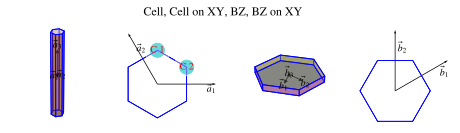

In [ ]:
import matplotlib.pyplot as plt, pivotpy as pp

poscar = POSCAR('POSCAR')
axs = sp.init_figure(ncols=4,figsize=(8,2))
poscar.splot_cell(ax=axs[0],colormap='hot').set_axis_off()
poscar.splot_cell(ax=axs[1],plane='xy').set_axis_off()
poscar.splot_bz(ax=axs[2]).set_axis_off()
poscar.splot_bz(ax=axs[3],plane='xy').set_axis_off()
pos = poscar.bring_in_cell(poscar.data.positions)
axs[1].scatter(pos[:,0],pos[:,1],c='c',s=200)
pp.add_text(ax=axs[1],xs=pos[:,0],ys=pos[:,1],txts=poscar.data.labels,transform=False)
_ = plt.gcf().suptitle('Cell, Cell on XY, BZ, BZ on XY')